In [ ]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
from glob import glob
from google.colab import drive

In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle


     |████████████████████████████████| 58 kB 3.6 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=363c2ead4924b28e3c80d8db8192c03c37611890b6670401261078f205c965b9
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vidipchhabra","key":"e715158a51739e07ed4eaa97f4a4cf29"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d moltean/fruits

 99% 1.21G/1.22G [00:09<00:00, 134MB/s]
100% 1.22G/1.22G [00:09<00:00, 134MB/s]


In [ ]:
! unzip fruits.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: dataset/fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: dataset/fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: dataset/fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: dataset/fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: dataset/fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: dataset/fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: dataset/fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: dataset/fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: dataset/fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: dataset/fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: dataset/fruits-360_data

In [ ]:
#Printing all file names under the input directory
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Kaggle/fruits-360_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

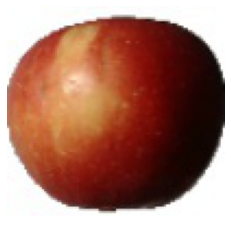

(100, 100, 3)


In [ ]:
#Setting Training & Test dir paths
train_path = '/content/dataset/fruits-360_dataset/fruits-360/Training'
test_path = '/content/dataset/fruits-360_dataset/fruits-360/Test'
#Displaying the image/content/dataset/fruits-360_dataset/fruits-360/Training/Apple Braeburn/0_100.jpg
img = load_img(train_path + "/Apple Braeburn/0_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)
#/content/drive/MyDrive/Kaggle/fruits-360-original-size/fruits-360-original-size/Training/apple_braeburn

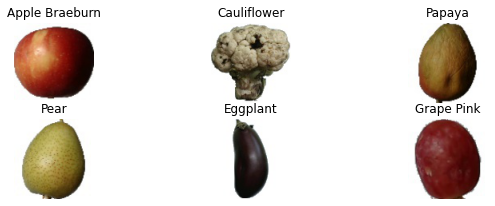

In [ ]:
#Visualizing more Images
images = ['Apple Braeburn', 'Cauliflower', 'Papaya', 'Pear', 'Eggplant', 'Grape Pink']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + "/" + images[i] +"/0_100.jpg", target_size=(100,100)))

In [ ]:
#Finding number of classes
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

131


In [ ]:
#Creating the model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class)) 
model.add(Activation("softmax"))

#Compiling the model
model.compile(loss = "categorical_crossentropy",
optimizer = "rmsprop",
metrics = ["accuracy"])

#Getting model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        1

In [ ]:
#Specifing epochs & batch size
epochs = 100
batch_size = 64

In [ ]:
#Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)
#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")
test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
#Fitting the model
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 800 // batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
25/25 [==============================] - 26s 987ms/step - loss: 4.7783 - accuracy: 0.0288 - val_loss: 4.4674 - val_accuracy: 0.0443
Epoch 2/100
25/25 [==============================] - 24s 973ms/step - loss: 4.1809 - accuracy: 0.0637 - val_loss: 3.7809 - val_accuracy: 0.0924
Epoch 3/100
25/25 [==============================] - 24s 973ms/step - loss: 3.6493 - accuracy: 0.1175 - val_loss: 3.5773 - val_accuracy: 0.0911
Epoch 4/100
25/25 [==============================] - 24s 975ms/step - loss: 3.2267 - accuracy: 0.1844 - val_loss: 2.6142 - val_accuracy: 0.3073
Epoch 5/100
25/25 [==============================] - 24s 973ms/step - loss: 2.8514 - accuracy: 0.2350 - val_loss: 2.3009 - val_accuracy: 0.3971
Epoch 6/100
25/25 [==============================] - 25s 983ms/step - loss: 2.4104 - accuracy: 0.3375 - val_loss: 1.9119 - val_accuracy: 0.5039
Epoch 7/100
25/25 [==============================] - 25s 983ms/step - loss: 2.2174 - accuracy: 0.3644 - val_loss: 1.5791 - val_accuracy:

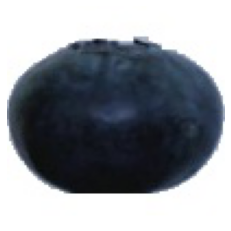

In [ ]:
#Displaying the selected image

img = load_img("/content/dataset/fruits-360_dataset/fruits-360/Test/Blueberry/118_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Loading the image 
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image = load('/content/dataset/fruits-360_dataset/fruits-360/Test/Blueberry/118_100.jpg')
#/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Test/Blueberry

In [ ]:
#Predicting the class
prediction = (np.argmax(model.predict(image), axis=-1))
print(prediction)

[20]


In [ ]:
#Printing class dictionary
print(test_generator.class_indices)

{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape White 4': 49, 'Grapefruit Pink': 50, 'Grapefrui

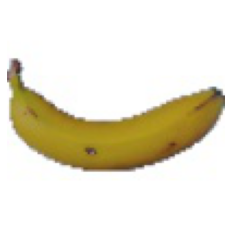

In [ ]:
#Displaying the selected image
img2 = load_img("/content/dataset/fruits-360_dataset/fruits-360/Test/Banana/100_100.jpg", target_size=(100,100))
plt.imshow(img2)
plt.axis("off")
plt.show()
#Loading the image 
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image2 = load('/content/dataset/fruits-360_dataset/fruits-360/Test/Banana/100_100.jpg')
#/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Test/Blueberry

In [ ]:
#Predicting the class
prediction = (np.argmax(model.predict(image2), axis=-1))
print(prediction)

[16]


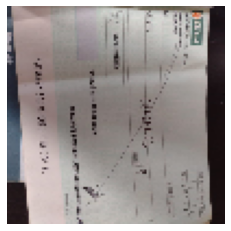

In [ ]:
#Displaying the selected image

img3 = load_img("/WhatsApp Image 2021-04-07 at 11.39.16.jpeg", target_size=(100,100))
plt.imshow(img3)
plt.axis("off")
plt.show()
#Loading the image 
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image3 = load("/WhatsApp Image 2021-04-07 at 11.39.16.jpeg")
#/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Test/Blueberry

In [ ]:
#Predicting the class
prediction = (np.argmax(model.predict(image3), axis=-1))
print(prediction)

InvalidArgumentError: ignored

In [ ]:
#Printing class dictionary
print(test_generator.class_indices)

{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape White 4': 49, 'Grapefruit Pink': 50, 'Grapefrui

355/355 - 69s - loss: 0.1420 - accuracy: 0.9634


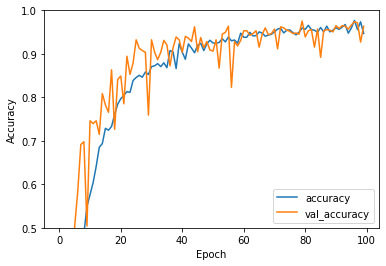

In [ ]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_generator, verbose=2)

In [ ]:
model.save('model.h5')

In [ ]:
model1=tf.keras.models.load_model('model.h5')

In [ ]:
prediction = (np.argmax(model1.predict(image3), axis=-1))
print(prediction)

[16]


In [ ]:
image3.shape

(1, 100, 100, 3)